#Módulo 3, 4 e 5 - Explicando Algoritmos Genéticos | Destravando Programação

# PROBLEMA A SER OTIMIZADO

Vamos realizar um processo de busca pelo o valor máximo da seguinte função:



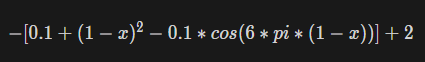

**APLICAÇÃO DE FUNÇÃO:**

Já temos aqui o uso de funções em python de forma a tornar a aplicação do problema mais fácil de ser gerenciada: 
vamos definir a função e chamá-la quando necessário durante nosso processo de busca.

Note como essa estrutura nos permite aplicar e retornar dados através de seu parâmetro. Ao longo do código não precisaremos escrever a fórmula sempre que for necessário, vamos apenas chamar a função fx(x) definindo um valor a ser usado na variável x.


In [ ]:
#Importação das Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [ ]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

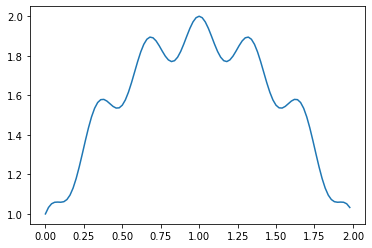

In [ ]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

plt.plot(x_axis,y_axis)

Podemos observar que o ponto mais alto está em torno do valor x = 1, que nos dá o maior valor possível para a função.

# POPULAÇÃO

Uma população é um conjunto de indivíduos que representam possíveis soluções para o problema. Vamos gerar essa população de forma aleatória codificando as características de cada individuo usando números decimais. 

**APLICAÇÃO DO FOR:**

Essa estrutura é muito útil nessa etapa, pois permite iterar sobre o valor definido para o número de individuos (um range) e aplicar uma operação do random para gerar um individuo aleatório com os valores que os genes podem assumir. Sobre esses valores dos genes também vamos iterar percorrendo as listas já definidas.

**APLICAÇÃO DE LISTAS:**

A estrutura de lista também é muito útil aqui para que possamos armazenar e manipular a população de forma simples. Neste caso, vamos criar uma lista aninhada para que o nosso indivíduo tenha apenas 0 ou 1 como parte inteira, assumindo assim somente valores de 0 a 1.99999 (pois sabemos que nosso valor está definido entre 0 e 2 pelo gráfico).

**APLICAÇÃO DE FUNÇÃO:**

Precisamos converter as listas em números decimais e para isso será muito útil a criação de uma função para chamá-la quando for usada a nossa população. O uso de números decimais nos fornecem uma representação mais precisa das soluções possíveis.


In [ ]:
populacao = []
genes = [[0,1],[0,1,2,3,4,5,6,7,8,9]]
tamanho_individuo = 15

for i in range (100):
     individuo = []
     individuo += [np.random.choice (genes[0])]
     individuo += list(np.random.choice (genes[1], tamanho_individuo - 1))
     populacao.append (individuo)

populacao [:10]

[[0, 6, 7, 0, 1, 8, 2, 7, 9, 0, 9, 3, 0, 7, 4],
 [0, 6, 9, 1, 4, 9, 6, 0, 4, 6, 6, 1, 1, 0, 0],
 [1, 4, 6, 1, 1, 4, 0, 4, 8, 7, 3, 5, 5, 0, 7],
 [1, 6, 7, 1, 0, 5, 6, 2, 0, 7, 7, 1, 1, 6, 0],
 [0, 8, 0, 6, 3, 7, 1, 0, 2, 1, 9, 5, 4, 6, 5],
 [1, 4, 8, 0, 1, 5, 4, 6, 9, 9, 4, 1, 1, 3, 0],
 [0, 9, 2, 1, 0, 3, 5, 8, 0, 4, 5, 7, 9, 4, 8],
 [0, 5, 9, 9, 7, 0, 1, 9, 4, 7, 9, 1, 9, 4, 3],
 [1, 8, 8, 1, 5, 7, 7, 7, 1, 5, 6, 5, 8, 0, 6],
 [1, 3, 3, 8, 6, 9, 9, 7, 1, 0, 1, 6, 3, 7, 0]]

In [ ]:
#Função para converter em decimais

def lista_para_decimal(num):
  decimal = 0
  for i in range(len(num)):
      decimal += num[i]*10**(-i)
  return decimal

In [ ]:
lista_para_decimal(individuo)
#individuo (linha) sempre entre 0 e 1

0.59944106772984

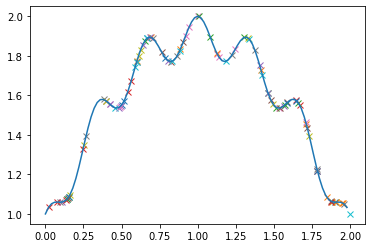

In [ ]:
for individuo in populacao:
    x = lista_para_decimal(individuo)
    y = fx(x)
    plt.plot (x,y,'x')
plt.plot (x_axis, y_axis)

# FUNÇÃO FITNESS

Essa função em algoritmos genéticos vai nos ajudar a medir o sucesso do nosso indivíduo (que é a nossa solução) em maximizar a nossa função. Ela avalia cada um deles para determinar qual é o mais apto para ser selecionado e reproduzido, para que possamos gerar soluções cada vez mais eficientes. No nosso caso, o critério será representar os valores de y em porcentagens obtidas de probabilidades. Todos os valores serão divididos pela soma total. Números maiores produzem uma porcentagem maior e isso já nos oferece os melhores individuos (aqueles que obtiveram números maiores em y).

**APLICAÇÃO DO FOR:**

Aqui essa estrutura irá iterar sobre a população e avaliar cada indivíduo com o cálculo definido na função fitness. 


**APLICAÇÃO DE FUNÇÃO:**

Perceba que chamamos duas das funções que já criamos (a com a função do problema e a de conversão para decimal), assim confirmamos que o uso de funções nos auxilia a tornar o código mais fácil de ser gerenciado.


In [ ]:
fitness = []

for individuo in populacao:
  x = lista_para_decimal(individuo)
  y = fx(x)
  fitness += [y]

fitness = np.array(fitness)
fitness = fitness/fitness.sum()

fitness

array([0.01226988, 0.0122898 , 0.01046604, 0.010053  , 0.01151815,
       0.01022835, 0.01234119, 0.01148559, 0.00688694, 0.01222945,
       0.00697693, 0.00685876, 0.01013705, 0.01049249, 0.00687463,
       0.0101971 , 0.01173443, 0.00687206, 0.00874709, 0.01149879,
       0.0100703 , 0.01190307, 0.00704478, 0.00673004, 0.00998056,
       0.01148867, 0.01297712, 0.01187473, 0.00903392, 0.01183947,
       0.00703781, 0.00703892, 0.00696226, 0.00790608, 0.0100444 ,
       0.0121341 , 0.01261789, 0.01169508, 0.00710747, 0.01226803,
       0.00790445, 0.01122866, 0.01228568, 0.00695094, 0.01203307,
       0.00689729, 0.00995942, 0.01024488, 0.00687432, 0.01105095,
       0.00687246, 0.01149964, 0.01217143, 0.00687789, 0.01002173,
       0.00702609, 0.01009751, 0.0122483 , 0.01188001, 0.0099686 ,
       0.01161938, 0.00945042, 0.00998129, 0.00861415, 0.01044924,
       0.01179263, 0.00951059, 0.00795981, 0.01018958, 0.006501  ,
       0.01019349, 0.01175976, 0.0129699 , 0.01021757, 0.01138

# CRUZAMENTO

Esse processo criará novas soluções a partir dos nossos indivíduos já existentes simulando a reprodução sexual, combinando as informações genéticas de dois indivíduos para reproduzir um novo indivíduo (filho). Aqui, vamos escolher dois indivíduos da população (nossa lista de retorno), aplicando a probabilidade feita em fitness e um ponto de cruzamento para depois adicionar à população de filhos.


**APLICAÇÃO DO FOR:**

Através dessa estrutura vamos iterar sobre a população e aplicar o processo de cruzamento em cada par de indivíduos selecionados.

In [ ]:
tamanho_populacao = len(populacao)

filhos = []

for i in range (tamanho_populacao//2): #divisão inteira: trunca o resultado para o menor inteiro mais próximo
    parentes = np.random.choice (tamanho_populacao, 2, p = fitness)
    ponto_de_cruzamento = np.random.randint (tamanho_individuo)
    filhos += [populacao [parentes [0]][:ponto_de_cruzamento] + populacao [parentes [1]][ponto_de_cruzamento:]]
    filhos += [populacao [parentes [1]][:ponto_de_cruzamento] + populacao [parentes [0]][ponto_de_cruzamento:]]

filhos [:10]    

[[0, 4, 9, 1, 7, 6, 4, 4, 4, 7, 4, 2, 2, 6, 4],
 [1, 9, 4, 7, 7, 8, 4, 4, 3, 5, 9, 9, 8, 4, 4],
 [0, 4, 2, 1, 5, 5, 2, 3, 9, 4, 5, 6, 6, 8, 3],
 [0, 5, 0, 1, 9, 4, 5, 2, 7, 9, 7, 8, 8, 0, 9],
 [0, 6, 2, 5, 3, 9, 9, 6, 2, 9, 4, 9, 5, 2, 6],
 [1, 9, 5, 2, 5, 3, 7, 3, 3, 2, 4, 2, 8, 9, 8],
 [0, 4, 2, 1, 0, 4, 3, 8, 9, 7, 1, 7, 2, 9, 3],
 [0, 5, 6, 4, 5, 5, 2, 2, 7, 9, 7, 8, 8, 0, 9],
 [0, 8, 0, 6, 3, 7, 1, 3, 5, 4, 1, 2, 9, 0, 7],
 [1, 3, 0, 6, 1, 7, 4, 0, 2, 1, 9, 5, 4, 6, 5]]

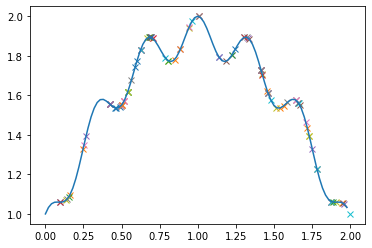

In [ ]:
populacao = filhos

for individuo in populacao:
    x = lista_para_decimal(individuo)
    y = fx(x)
    plt.plot (x,y,'x')
plt.plot (x_axis, y_axis)

Perceba que em uma única geração já podemos ver que os indivíduos estão se concentrando nos pontos mais altos da função.

# MUTAÇÕES

Mutações introduzem variações em indivíduos da população, simulando os efeitos de cópias com erros do DNA. É útil para evitar que a população fique presa em um ótimo local, permitindo que a busca explore novas áreas do espaço de busca.

**APLICAÇÃO DO FOR:**

Neste processo, o for vai iterar sobre a população inteira e aplicar a mutação em cada indivíduo selecionado usando a probabilidade de ocorrer uma mutação e assim adicionando à população a cada vez que o processo é repetido.

**APLICAÇÃO DE FUNÇÃO:**

Nessa etapa temos uma função para aplicar a mutação em um indivíduo e retornar adicionando-o população. Note que ao chamá-la passamos três parâmetros: a população, o valor da probabilidade e o conjunto de variedade de genes que definimos na etapa da representação da população.

In [ ]:
def mutar (individuos_mutacao, probabilidade, genes):
    for i in range (len(individuos_mutacao)):
        mutacao_individual = individuos_mutacao[i]
        if np.random.random() <probabilidade:
            mutacao = np.random.choice (genes[0])
            mutacao_individual = [mutacao] + mutacao_individual[1:]

        for j in range(1, len(mutacao_individual)):
            if np.random.random() < probabilidade:
               mutacao = np.random.choice(genes[1])
               mutacao_individual = mutacao_individual[0:j] + [mutacao] + mutacao_individual[j+1:]
        individuos_mutacao[i] = mutacao_individual

In [ ]:
mutar(populacao,0.005,genes)
populacao[:10]

[[0, 4, 9, 1, 7, 6, 4, 4, 4, 7, 4, 2, 2, 6, 4],
 [1, 9, 4, 7, 7, 8, 4, 4, 3, 5, 9, 9, 8, 4, 4],
 [0, 4, 2, 1, 5, 5, 2, 3, 9, 4, 5, 6, 6, 8, 3],
 [0, 5, 0, 1, 9, 4, 5, 2, 7, 9, 7, 8, 8, 0, 9],
 [0, 6, 2, 5, 3, 9, 9, 6, 2, 9, 4, 9, 5, 2, 6],
 [1, 9, 5, 2, 5, 3, 7, 3, 3, 2, 4, 2, 8, 9, 8],
 [0, 4, 2, 1, 0, 4, 3, 8, 9, 7, 1, 7, 2, 9, 3],
 [0, 5, 6, 4, 5, 5, 2, 2, 7, 9, 7, 8, 8, 0, 9],
 [0, 8, 0, 6, 3, 7, 1, 3, 5, 4, 1, 2, 9, 0, 7],
 [1, 3, 0, 6, 1, 7, 4, 0, 2, 1, 9, 5, 4, 6, 5]]

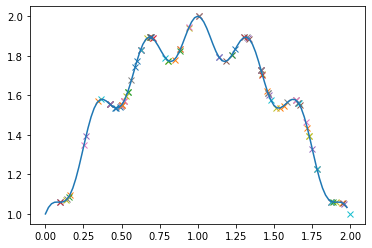

In [ ]:
for individuo in populacao:
    x = lista_para_decimal(individuo)
    y = fx(x)
    plt.plot (x,y,'x')
plt.plot (x_axis, y_axis)

OBS.: Não mudou muito devido à baixa chance de mutação, mas é assim que precisa ser. Mutações muito altas podem levar a soluções inviáveis, enquanto que se forem baixas podem ficar presas a um ótimo local.

# RESULTADO

In [ ]:
geracoes = 100

for _ in range(geracoes):

      fitness = []

      for individuo in populacao:
            x = lista_para_decimal(individuo)
            y = fx(x)
            fitness += [y]

      fitness = np.array(fitness)
      fitness = fitness/fitness.sum()

      filhos = []

      for i in range (tamanho_populacao//2):
         parentes = np.random.choice(tamanho_populacao,2,p=fitness)
         ponto_de_cruzamento = np.random.randint(tamanho_individuo)
         filhos += [populacao [parentes [0]][:ponto_de_cruzamento] + populacao [parentes [1]][ponto_de_cruzamento:]]
         filhos += [populacao [parentes [1]][:ponto_de_cruzamento] + populacao [parentes [0]][ponto_de_cruzamento:]] 

      populacao = filhos

      mutar(populacao, 0.005, genes)     

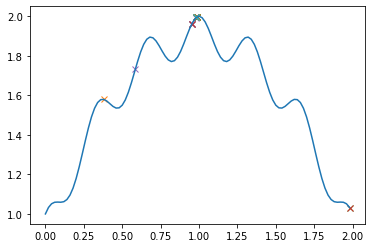

In [ ]:
for individuo in populacao:
    x = lista_para_decimal(individuo)
    y = fx(x)
    plt.plot (x,y,'x')
plt.plot (x_axis, y_axis)

Depois de 100 gerações podemos ver que a maioria dos indivíduos está concentrada em torno do valor máximo. Quanto mais deixarmos reproduzir por um número maior de gerações mais os indivíduos estarão próximo do máximo.